**Loading & Exploring the Dataset**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib  # For saving the best model

# Load your dataset (replace 'your_dataset.csv' with the actual file)
df = pd.read_csv('customer_churn_data.csv')

df['InternetService'].value_counts(dropna=False)


# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)    

print(df['InternetService'].value_counts(dropna=False))


# Convert categorical columns if needed


   CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2           63.79  Month-to-Month   
3           4   60  Female       8          102.34        One-Year   
4           5   42    Male      32           69.01  Month-to-Month   

  InternetService  TotalCharges TechSupport Churn  
0     Fiber Optic        353.40         Yes   Yes  
1     Fiber Optic          0.00         Yes   Yes  
2     Fiber Optic        127.58          No   Yes  
3             DSL        818.72         Yes   Yes  
4             NaN       2208.32          No   Yes  
CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64
CustomerID           int

Checking Unique Values

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Print basic info
print(df.info())  # Check data types and missing values
print(df.describe())  # Check distributions
print(df.head())  # View first rows

# Check unique values in the target column
print("Unique values in y (target variable):", df['Churn'].unique())

# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Check if target variable has only one value
if len(df['Churn'].unique()) == 1:
    print("⚠️ Warning: The target variable has only one unique value!")
else:
    print("✅ Target variable has multiple values.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB
None
        CustomerID          Age      Tenure  MonthlyCharges  TotalCharges
count  1000.000000  1000.000000  1000.00000     1000.000000   1000.000000
mean    500.500000    44.674000    18.97300       74.391290   1404.364060
std     288.819436     9.797741    18.89257       25

Correlation Heatmap

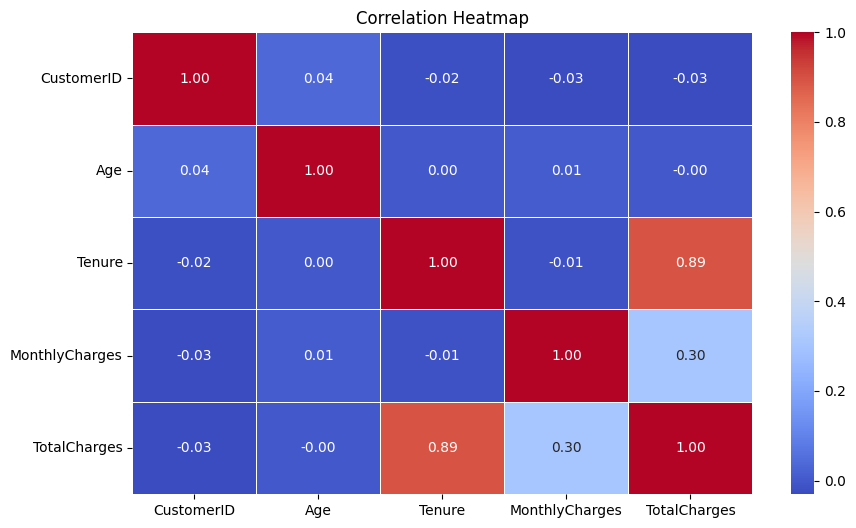

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("customer_churn_data.csv")  # Change to your actual dataset filename

# Drop non-numeric columns before correlation
numeric_df = df.select_dtypes(include=["number"])

# 🔹 Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Scatterplot

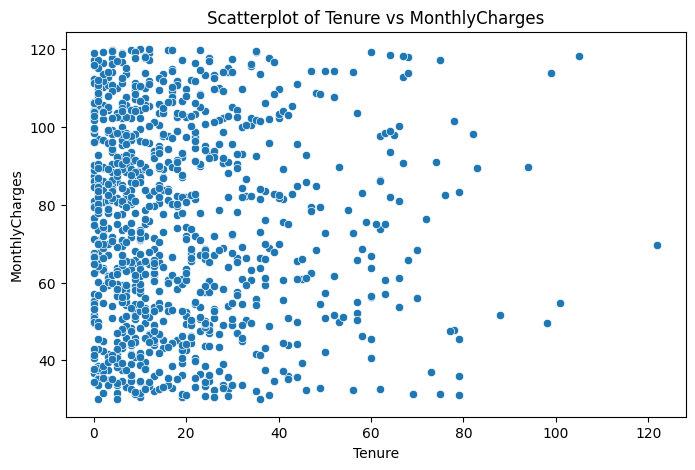

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("customer_churn_data.csv")  # Change to your actual dataset filename

# Drop non-numeric columns before correlation
numeric_df = df.select_dtypes(include=["number"])

# 🔹 Scatterplot (choose two numeric columns to compare)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Tenure"], y=df["MonthlyCharges"])  # Replace with actual column names
plt.title("Scatterplot of Tenure vs MonthlyCharges")
plt.xlabel("Tenure")
plt.ylabel("MonthlyCharges")
plt.show()

Saving Valid Columns

In [38]:
import joblib

# Drop 'CustomerID' if it exists
df.drop(columns=['CustomerID'], inplace=True, errors='ignore')

# Save correct column names
joblib.dump(df.drop(columns=['Churn']).columns.tolist(), "columns.pkl")


['columns.pkl']

Training and Testing

In [39]:
from sklearn.linear_model import SGDRegressor

# Create a Linear Regression model with Stochastic Gradient Descent (SGD)
sgd_regressor = SGDRegressor(max_iter=1000, learning_rate='optimal', eta0=0.01, random_state=42)

# Train the model
sgd_regressor.fit(X_train, y_train)


SGDRegressor(learning_rate='optimal', random_state=42)

**Preprocessing the Data**

In [40]:
# Ensure df is a full copy to avoid modifying a view
df = df.copy()

# Fill missing values correctly
df['InternetService'] = df['InternetService'].fillna('No Service')

# Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoders for later use

# Select Features and Target
X = df.drop(columns=['Churn'])  # Assuming 'Churn' is the target column
y = df['Churn']

# Split Data into Train & Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Numerical Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Training a linear regression model using Gradient Descent**

In [41]:
from sklearn.metrics import mean_squared_error

# Train a Linear Regression model using Gradient Descent
lr = SGDRegressor(max_iter=1000, learning_rate='optimal', tol=1e-3, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Linear Regression Train MSE: {train_mse:.4f}")
print(f"Linear Regression Test MSE: {test_mse:.4f}")

Linear Regression Train MSE: 0.3115
Linear Regression Test MSE: 0.3156


**Plotting loss curve**

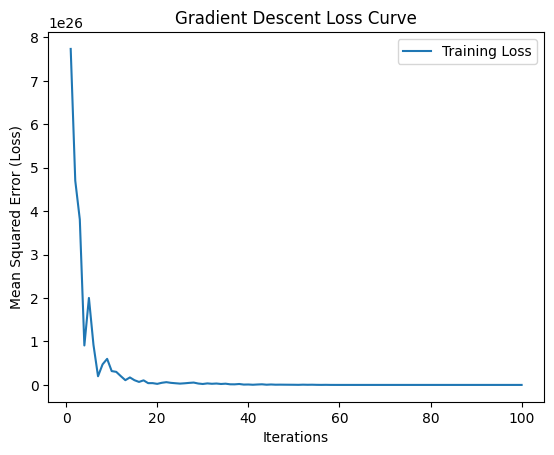

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor

# Re-initialize the model
lr = SGDRegressor(max_iter=1, learning_rate='optimal', tol=None, random_state=42, warm_start=True)

# Store loss values
loss_values = []

for i in range(100):  # Train for 100 iterations
    lr.partial_fit(X_train, y_train)  # Perform one iteration of training
    y_pred = lr.predict(X_train)  # Predict training data
    loss = mean_squared_error(y_train, y_pred)  # Compute loss (MSE)
    loss_values.append(loss)

# Plot loss curve
plt.plot(range(1, 101), loss_values, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Gradient Descent Loss Curve")
plt.legend()
plt.show()


**Training Decision Tree and Random Forest**

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Drop unnecessary columns (CustomerID isn't useful for prediction)
df.drop(columns=['CustomerID'], inplace=True, errors='ignore')

# Save correct column names
joblib.dump(df.drop(columns=['Churn']).columns.tolist(), "columns.pkl")

# Fix Pandas warning - Fill missing values correctly
df = df.copy()  # Avoid chained assignment issues
df['InternetService'] = df['InternetService'].fillna(df['InternetService'].mode()[0])

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert text to numbers
    label_encoders[col] = le  # Store for later use

# Save the dictionary of label encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Separate features (X) and target (y)
X = df.drop(columns=['Churn'])  # All features except the target
y = df['Churn']  # Target variable (0 = No, 1 = Yes)

# Ensure train-test separation is correct
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Scale numerical features (not required for trees, but useful for consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Prevent Overfitting: Adjust `max_depth`, `min_samples_split`, and `min_samples_leaf`
dt = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=10, random_state=42)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_dt_pred)

rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=20, min_samples_leaf=10, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_rf_pred)

# Print classification accuracy
print(f"✅ Decision Tree Test Accuracy: {dt_acc:.4f}")
print(f"✅ Random Forest Test Accuracy: {rf_acc:.4f}")


✅ Decision Tree Test Accuracy: 1.0000
✅ Random Forest Test Accuracy: 0.9850


**Saving the best model**

In [44]:
# Identify the best model based on test accuracy
best_model = None
best_score = 0
model_name = ""

if dt_acc > rf_acc:  # Compare accuracy instead of MSE
    best_model = dt
    best_score = dt_acc
    model_name = "decision_tree.pkl"
else:
    best_model = rf
    best_score = rf_acc
    model_name = "random_forest.pkl"

# Save the best model
import joblib
joblib.dump(best_model, model_name)

print(f"✅ Best model saved as {model_name} with accuracy: {best_score:.4f}")


✅ Best model saved as decision_tree.pkl with accuracy: 1.0000


Scatterplot after training

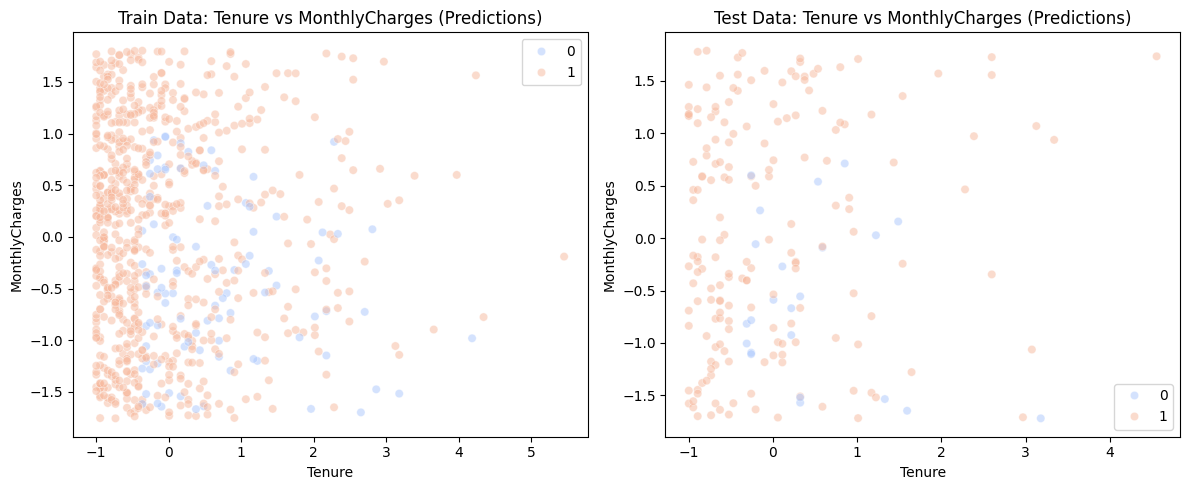

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert X_train and X_test back to DataFrames
X_train_df = pd.DataFrame(X_train, columns=correct_columns)
X_test_df = pd.DataFrame(X_test, columns=correct_columns)

# Choose two features to visualize
feature_x = "Tenure"  # Change this to any feature name
feature_y = "MonthlyCharges"  # Change this to any feature name

# Predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Scatter plot for chosen features vs model predictions
plt.figure(figsize=(12, 5))

# Train Data Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train_df[feature_x], y=X_train_df[feature_y], hue=y_train_pred, alpha=0.5, palette="coolwarm")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Train Data: {feature_x} vs {feature_y} (Predictions)")

# Test Data Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_df[feature_x], y=X_test_df[feature_y], hue=y_test_pred, alpha=0.5, palette="coolwarm")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Test Data: {feature_x} vs {feature_y} (Predictions)")

plt.tight_layout()
plt.show()


**Script for loading and redirecting**

In [49]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the best model
model = joblib.load("decision_tree.pkl")

# Load the saved label encoders, scaler, and correct column order
label_encoders = joblib.load("label_encoders.pkl")  # Load the dictionary
scaler = joblib.load("scaler.pkl")
correct_columns = joblib.load("columns.pkl")  # Load correct column names

# Define new data for prediction (replace values with real inputs)
new_data = pd.DataFrame([{
    'Age': 45,
    'Tenure': 12,
    'MonthlyCharges': 80.5,
    'TotalCharges': 966.0,
    'Gender': 'Male',
    'ContractType': 'Month-to-Month',
    'InternetService': 'Fiber Optic',
    'TechSupport': 'Yes'
}])

# Encode categorical columns using the saved label encoders
for col in label_encoders.keys():  
    if col in new_data.columns:
        new_data[col] = label_encoders[col].transform(new_data[col])

# Ensure the columns match training (CustomerID must be removed)
new_data = new_data.reindex(columns=correct_columns, fill_value=0)  # Fill missing columns with 0

# Scale numerical features using the same scaler from training
new_data_scaled = scaler.transform(new_data)

# Make a prediction
prediction = model.predict(new_data_scaled)
print(f"Predicted Churn: {'Yes' if prediction[0] == 1 else 'No'}")


Predicted Churn: Yes
